In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data)
clinical_trial_data = pd.read_csv(clinical_trial_data)

mouse_drug_data.head()
clinical_trial_data.head()

# Combine the data into a single dataset
df = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID", how="left")

df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
avg_tumor_volume = df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
# Preview DataFrame
tumor_volume_df = pd.DataFrame(avg_tumor_volume)
tumor_volume_df = tumor_volume_df.reset_index()
tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_SE = df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]


# Convert to DataFrame
# Preview DataFrame
tumor_SE_df = pd.DataFrame(tumor_SE) 
tumor_SE_df = tumor_SE_df.reset_index()
tumor_SE_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
reformat_df = tumor_volume_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
reformat_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


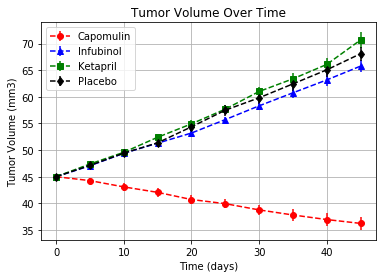

In [5]:
# Generate the Plot (with Error Bars)
plt.errorbar(reformat_df.index, reformat_df["Capomulin"], yerr=tumor_SE["Capomulin"], label = "Capomulin", color="red", marker="o", linestyle="--")
plt.errorbar(reformat_df.index, reformat_df["Infubinol"], yerr=tumor_SE["Infubinol"], label = "Infubinol", color="blue", marker="^", linestyle="--")
plt.errorbar(reformat_df.index, reformat_df["Ketapril"], yerr=tumor_SE["Ketapril"], label = "Ketapril", color="green", marker="s", linestyle="--")
plt.errorbar(reformat_df.index, reformat_df["Placebo"], yerr=tumor_SE["Placebo"], label = "Placebo", color="black", marker="d", linestyle="--")

# Make it pretty
plt.title("Tumor Volume Over Time")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()
plt.grid()

# Save the Figure
plt.savefig("tumor_response_to_treatment.png")


## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
avg_metastatic_sites = df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
# Preview DataFrame
metastatic_resp_df = pd.DataFrame(avg_metastatic_sites)
metastatic_resp_df = metastatic_resp_df.reset_index()
metastatic_resp_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_SE = df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
# Preview DataFrame
metastatic_SE_df = pd.DataFrame(metastatic_SE) 
metastatic_SE_df = metastatic_SE_df.reset_index()
metastatic_SE_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
reformat_meta_df = metastatic_resp_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
reformat_meta_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


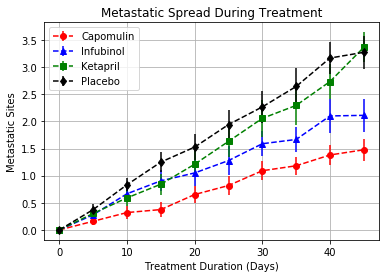

In [9]:
# Generate the Plot (with Error Bars)
plt.errorbar(reformat_meta_df.index, reformat_meta_df["Capomulin"], yerr=metastatic_SE["Capomulin"], label = "Capomulin", color="red", marker="o", linestyle="--")
plt.errorbar(reformat_meta_df.index, reformat_meta_df["Infubinol"], yerr=metastatic_SE["Infubinol"], label = "Infubinol", color="blue", marker="^", linestyle="--")
plt.errorbar(reformat_meta_df.index, reformat_meta_df["Ketapril"], yerr=metastatic_SE["Ketapril"], label = "Ketapril", color="green", marker="s", linestyle="--")
plt.errorbar(reformat_meta_df.index, reformat_meta_df["Placebo"], yerr=metastatic_SE["Placebo"], label = "Placebo", color="black", marker="d", linestyle="--")

# Make it pretty
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.legend()
plt.grid()

# Save the Figure
plt.savefig("metastatic_spread_during_treatment.png")


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
by_mice = df.groupby(["Drug", "Timepoint"]).nunique()["Mouse ID"]

# Convert to DataFrame
# Preview DataFrame
by_mice_df = pd.DataFrame(by_mice)
by_mice_df = by_mice_df.reset_index()
by_mice_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mice_df = by_mice_df.pivot(index="Timepoint", columns="Drug", values="Mouse ID")

# Preview that Reformatting worked
reformat_mice_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


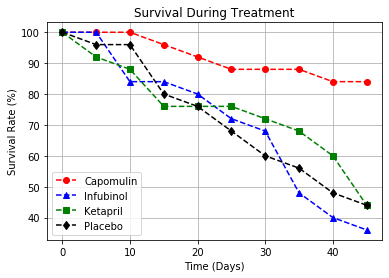

In [12]:
# Generate the Plot (Accounting for percentages)
# Each drug starts with 25 mice total
plt.errorbar(reformat_mice_df.index, (reformat_mice_df["Capomulin"]/25 * 100), label = "Capomulin", color="red", marker="o", linestyle="--")
plt.errorbar(reformat_mice_df.index, (reformat_mice_df["Infubinol"]/25 * 100), label = "Infubinol", color="blue", marker="^", linestyle="--")
plt.errorbar(reformat_mice_df.index, (reformat_mice_df["Ketapril"]/25 * 100), label = "Ketapril", color="green", marker="s", linestyle="--")
plt.errorbar(reformat_mice_df.index, (reformat_mice_df["Placebo"]/25 * 100), label = "Placebo", color="black", marker="d", linestyle="--")

# Make it pretty
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend()
plt.grid()

# Save the Figure
plt.savefig("survival_treatment.png")


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
change = (reformat_df.iloc[-1]/(reformat_df.iloc[0])-1)*100

# Display the data to confirm
change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

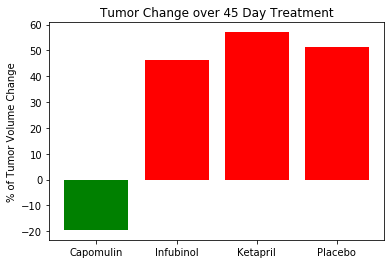

In [55]:
# Store all Relevant Percent Changes into a Tuple
change_list = list(change)

# Splice the data between passing and failing drugs
change_list.sort()

# Orient widths. Add labels, tick marks, etc. 

plt.bar("Capomulin", change["Capomulin"], label = "Capomulin", color="green")
plt.bar("Infubinol", change["Infubinol"], label = "Infubinol", color="red")
plt.bar("Ketapril", change["Ketapril"], label = "Ketapril", color="red")
plt.bar("Placebo", change["Placebo"], label = "Placebo", color="red")

# Use functions to label the percentages of changes
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

# Make it pretty
plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("% of Tumor Volume Change")

# Save the Figure
plt.savefig("TumorChangeOverTreatment.png")



![Metastatic Spread During Treatment](../Images/change.png)

In [ ]:
#OBSERVATIONS 
#Capomulin and Ramicane are the only drugs effective at lowering tumors! 
#Some trial drugs are actually accelerating tumor growth faster than if the patient was not being treated or on a placebo.
#All other trial drugs are ineffective, allowing tumors to grow as if patients were not being treated or on a placebo.